# Data transformation visualization



### Setting up libs and file handlers

In [1]:
import pandas as pd
import numpy as np

RAW_DATA_PATH = '../../Data/raw_data/'
PROCESSED_DATA_PATH = '../../Data/clean_data/'
TRAIN_TEST_SET = '../../Data/train_test/'
AUGMENTED_DATA_PATH = '../../Data/aug_data/'
META_DATA_PATH = '../../Data/meta/'
IMAGE_PATH = '../../Images/'
AUGMENTED_DATA_SIZES = pd.Series(np.arange(25, 425, 25).astype(str)).map('{}_jammed.csv'.format)


### Raw data and outliers

In [2]:
### Gets raw data
raw_data = pd.read_csv(RAW_DATA_PATH+'fz.csv', index_col=0)
raw_data_labels = pd.read_csv(RAW_DATA_PATH+'labels.csv', index_col=0)

### Chooses 4 random examples from each category
mount_samples_idx = np.random.choice(
    raw_data_labels[raw_data_labels['label']==1].index.values.astype('int16'),4)
jammed_samples_idx = np.random.choice(
    raw_data_labels[raw_data_labels['label']==2].index.values.astype('int16'),4)
nmount_samples_idx = np.random.choice(
    raw_data_labels[raw_data_labels['label']==3].index.values.astype('int16'),4)

### Transfroms each example into a numpy array
mount_samples = np.array(raw_data.iloc[mount_samples_idx-1])*(-1)
jammed_samples = np.array(raw_data.iloc[jammed_samples_idx-1])*(-1)
nmount_samples = np.array(raw_data.iloc[nmount_samples_idx-1])*(-1)
raw_set_samples = [mount_samples[0], jammed_samples[0], nmount_samples[0]]

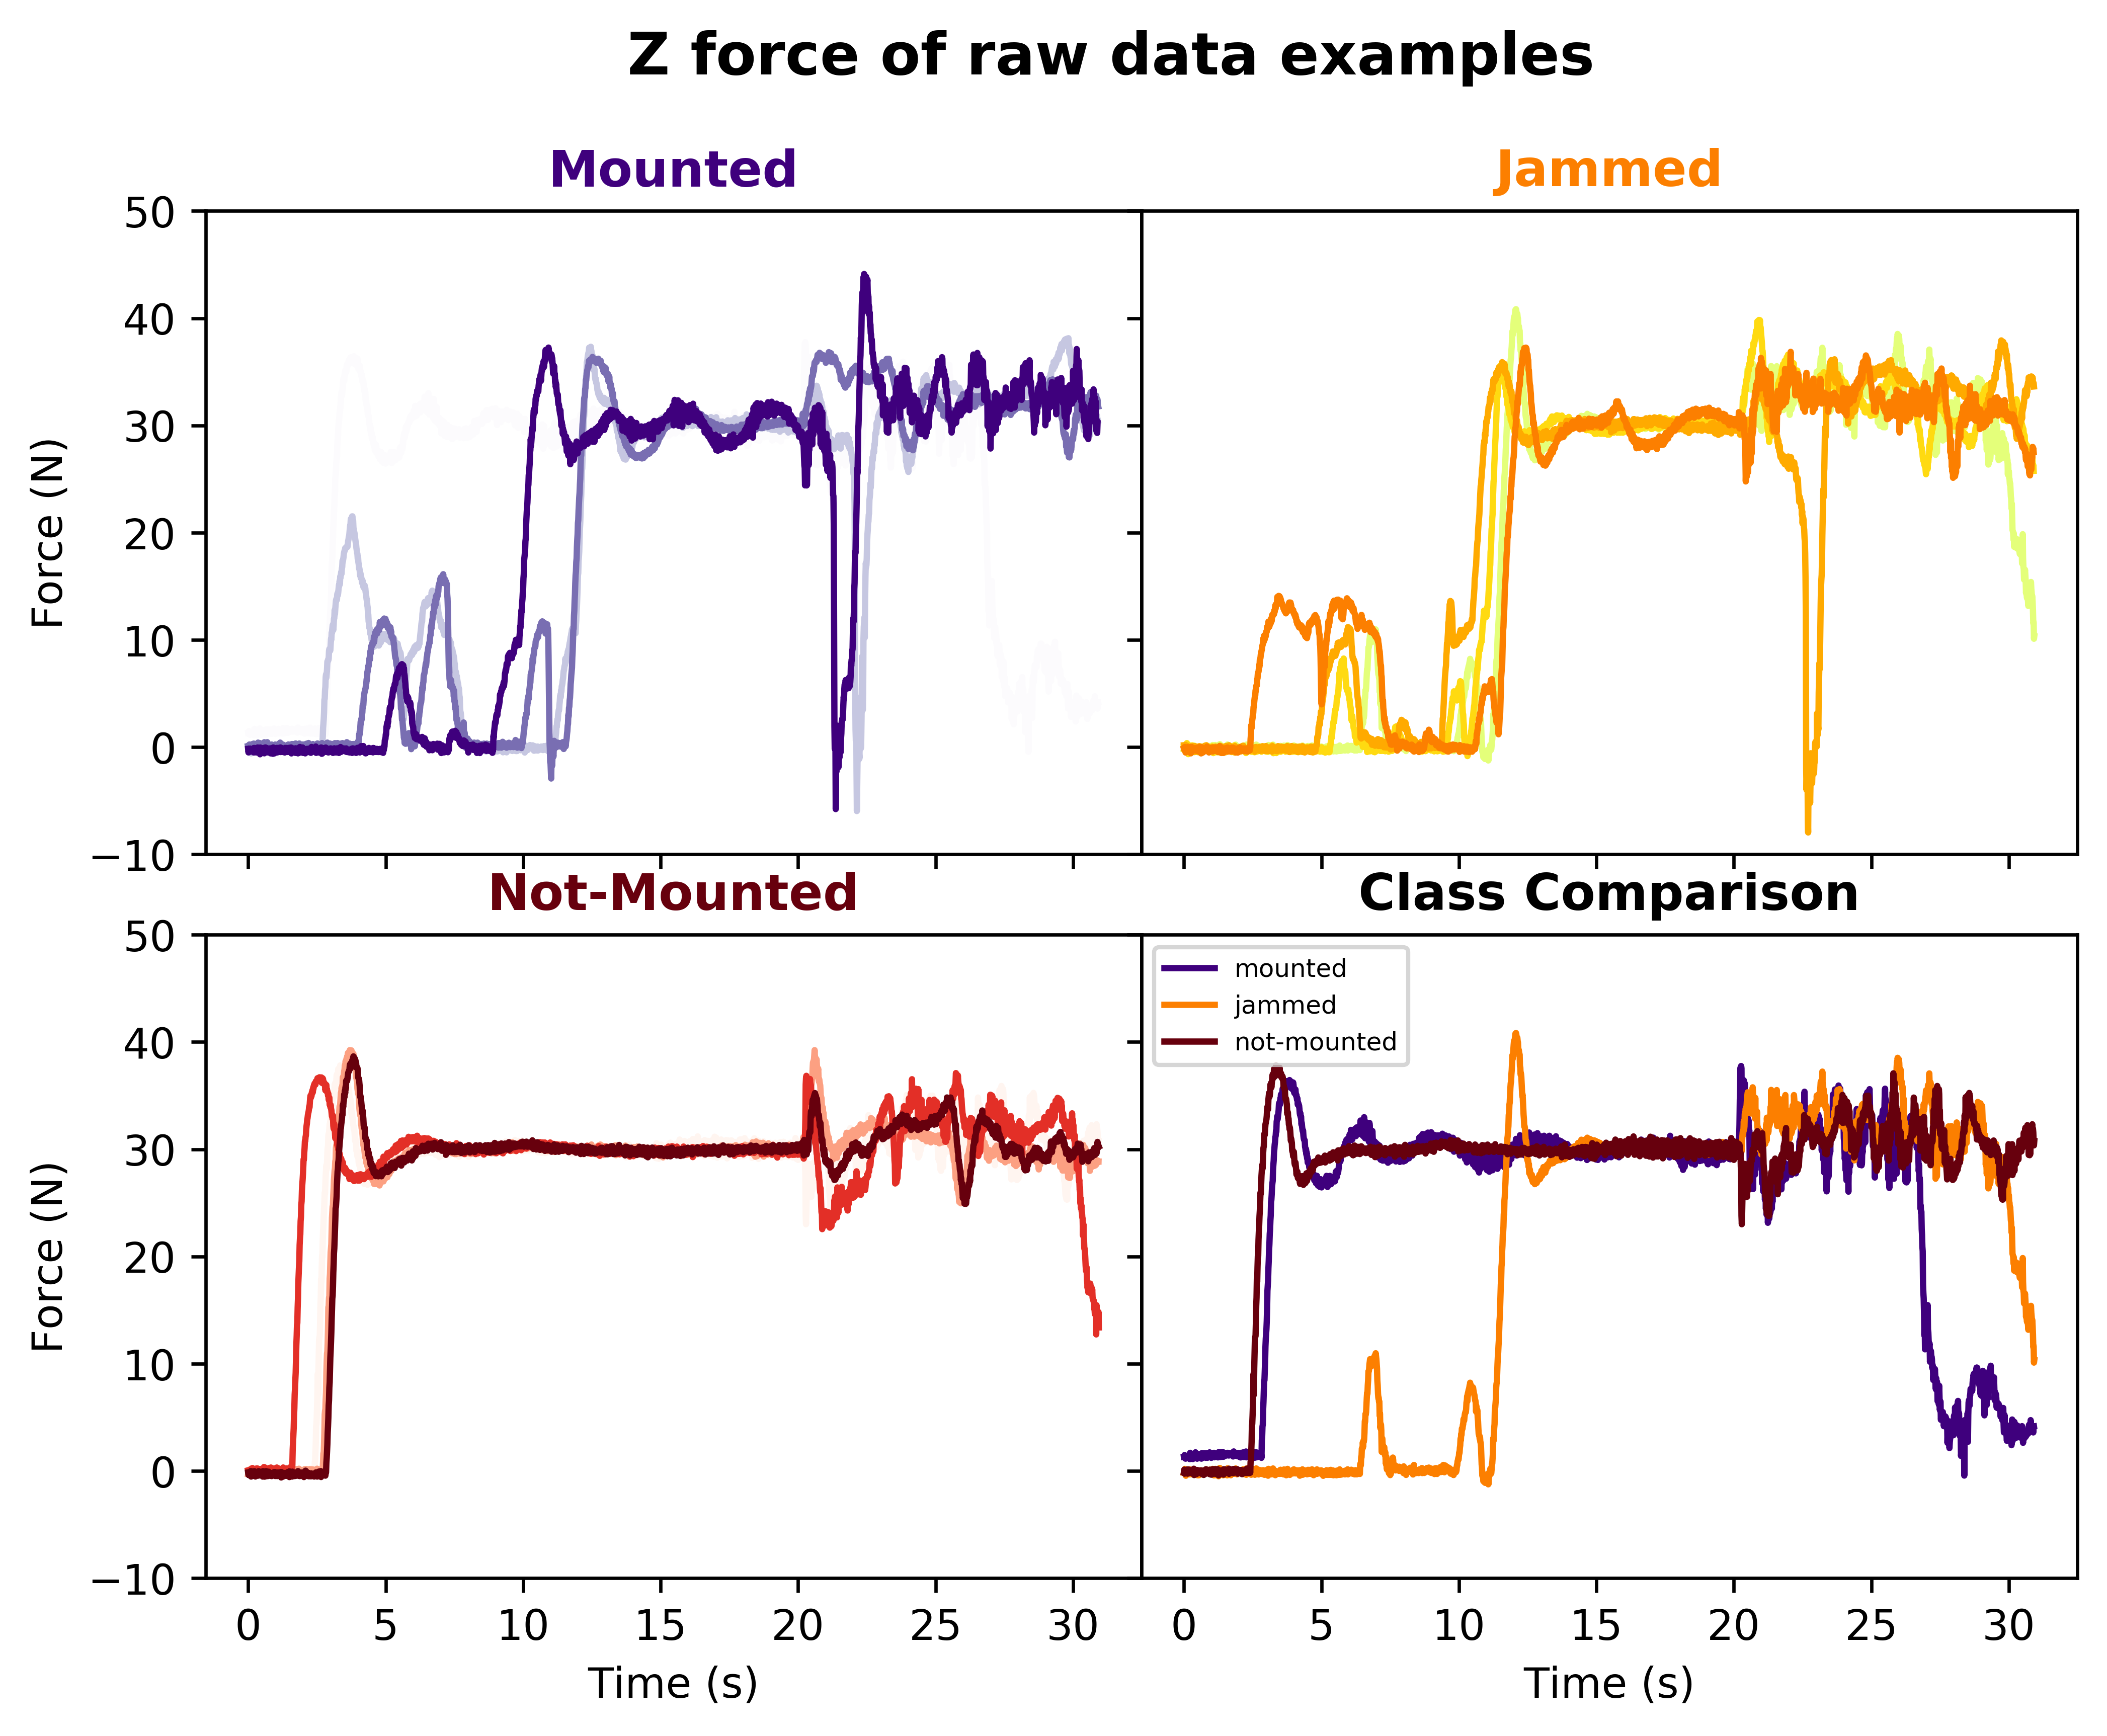

In [3]:
### Imports colormap library
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sb

### Starts matplotlib on jupyter notebook
%matplotlib inline

### Sets subplots
fig_raw, ax_raw = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6), dpi=600)
fig_raw.suptitle('Z force of raw data examples', fontsize=14, fontweight='bold')

### Sets up color schemes
purple = cm.Purples(np.linspace(0,1,4))
red = cm.Reds(np.linspace(0,1,4))
orange = cm.Wistia(np.linspace(0,1,4))
magma = cm.magma(np.linspace(0.2,0.7,4))
colors_set = [purple[3], orange[3], red[3]]

classes = ['mounted','jammed','not-mounted']
x_axis = np.linspace(0,len((mount_samples[0]))*12/(1000), len(mount_samples[0]) )

for i, p, o, r in zip(range(4), purple, orange, red):
    
    ax_raw[0,0].plot(x_axis, mount_samples[i], color=p)
    ax_raw[0,1].plot(x_axis, jammed_samples[i], color=o)
    ax_raw[1,0].plot(x_axis, nmount_samples[i], color=r)
    
    if i != 3:
        ax_raw[1,1].plot(x_axis, raw_set_samples[i],color=colors_set[i], label=classes[i])

ax_raw[0,0].set_ylim([-10,50])
    
ax_raw[0,0].set_title('Mounted', color=purple[3], fontweight='bold')
ax_raw[0,1].set_title('Jammed', color=orange[3], fontweight='bold') 
ax_raw[1,0].set_title('Not-Mounted', color=red[3], fontweight='bold') 
ax_raw[1,1].set_title('Class Comparison', fontweight='bold')

ax_raw[1,0].set_xlabel('Time (s)')
ax_raw[1,1].set_xlabel('Time (s)')
ax_raw[0,0].set_ylabel('Force (N)')
ax_raw[1,0].set_ylabel('Force (N)')
ax_raw[1,1].legend(loc='upper left', prop={'size':6})

plt.subplots_adjust(wspace=0.0,hspace=0.125)
plt.rcParams['axes.grid'] = True

fig_raw.savefig(IMAGE_PATH+'raw_data.jpg', dpi=600, bbox_inches='tight')
fig_raw.savefig(IMAGE_PATH+'raw_data.png', dpi=600, bbox_inches='tight')

### Outliers

#### Outliers were mainly due to offset in force values

In [4]:
outliers = pd.read_csv(META_DATA_PATH+'outliers.csv',index_col=0)

outl_samples_idx = np.random.choice(outliers['Experiments'],4)
outl_samples = (np.array(raw_data.iloc[outl_samples_idx]))*(-1)


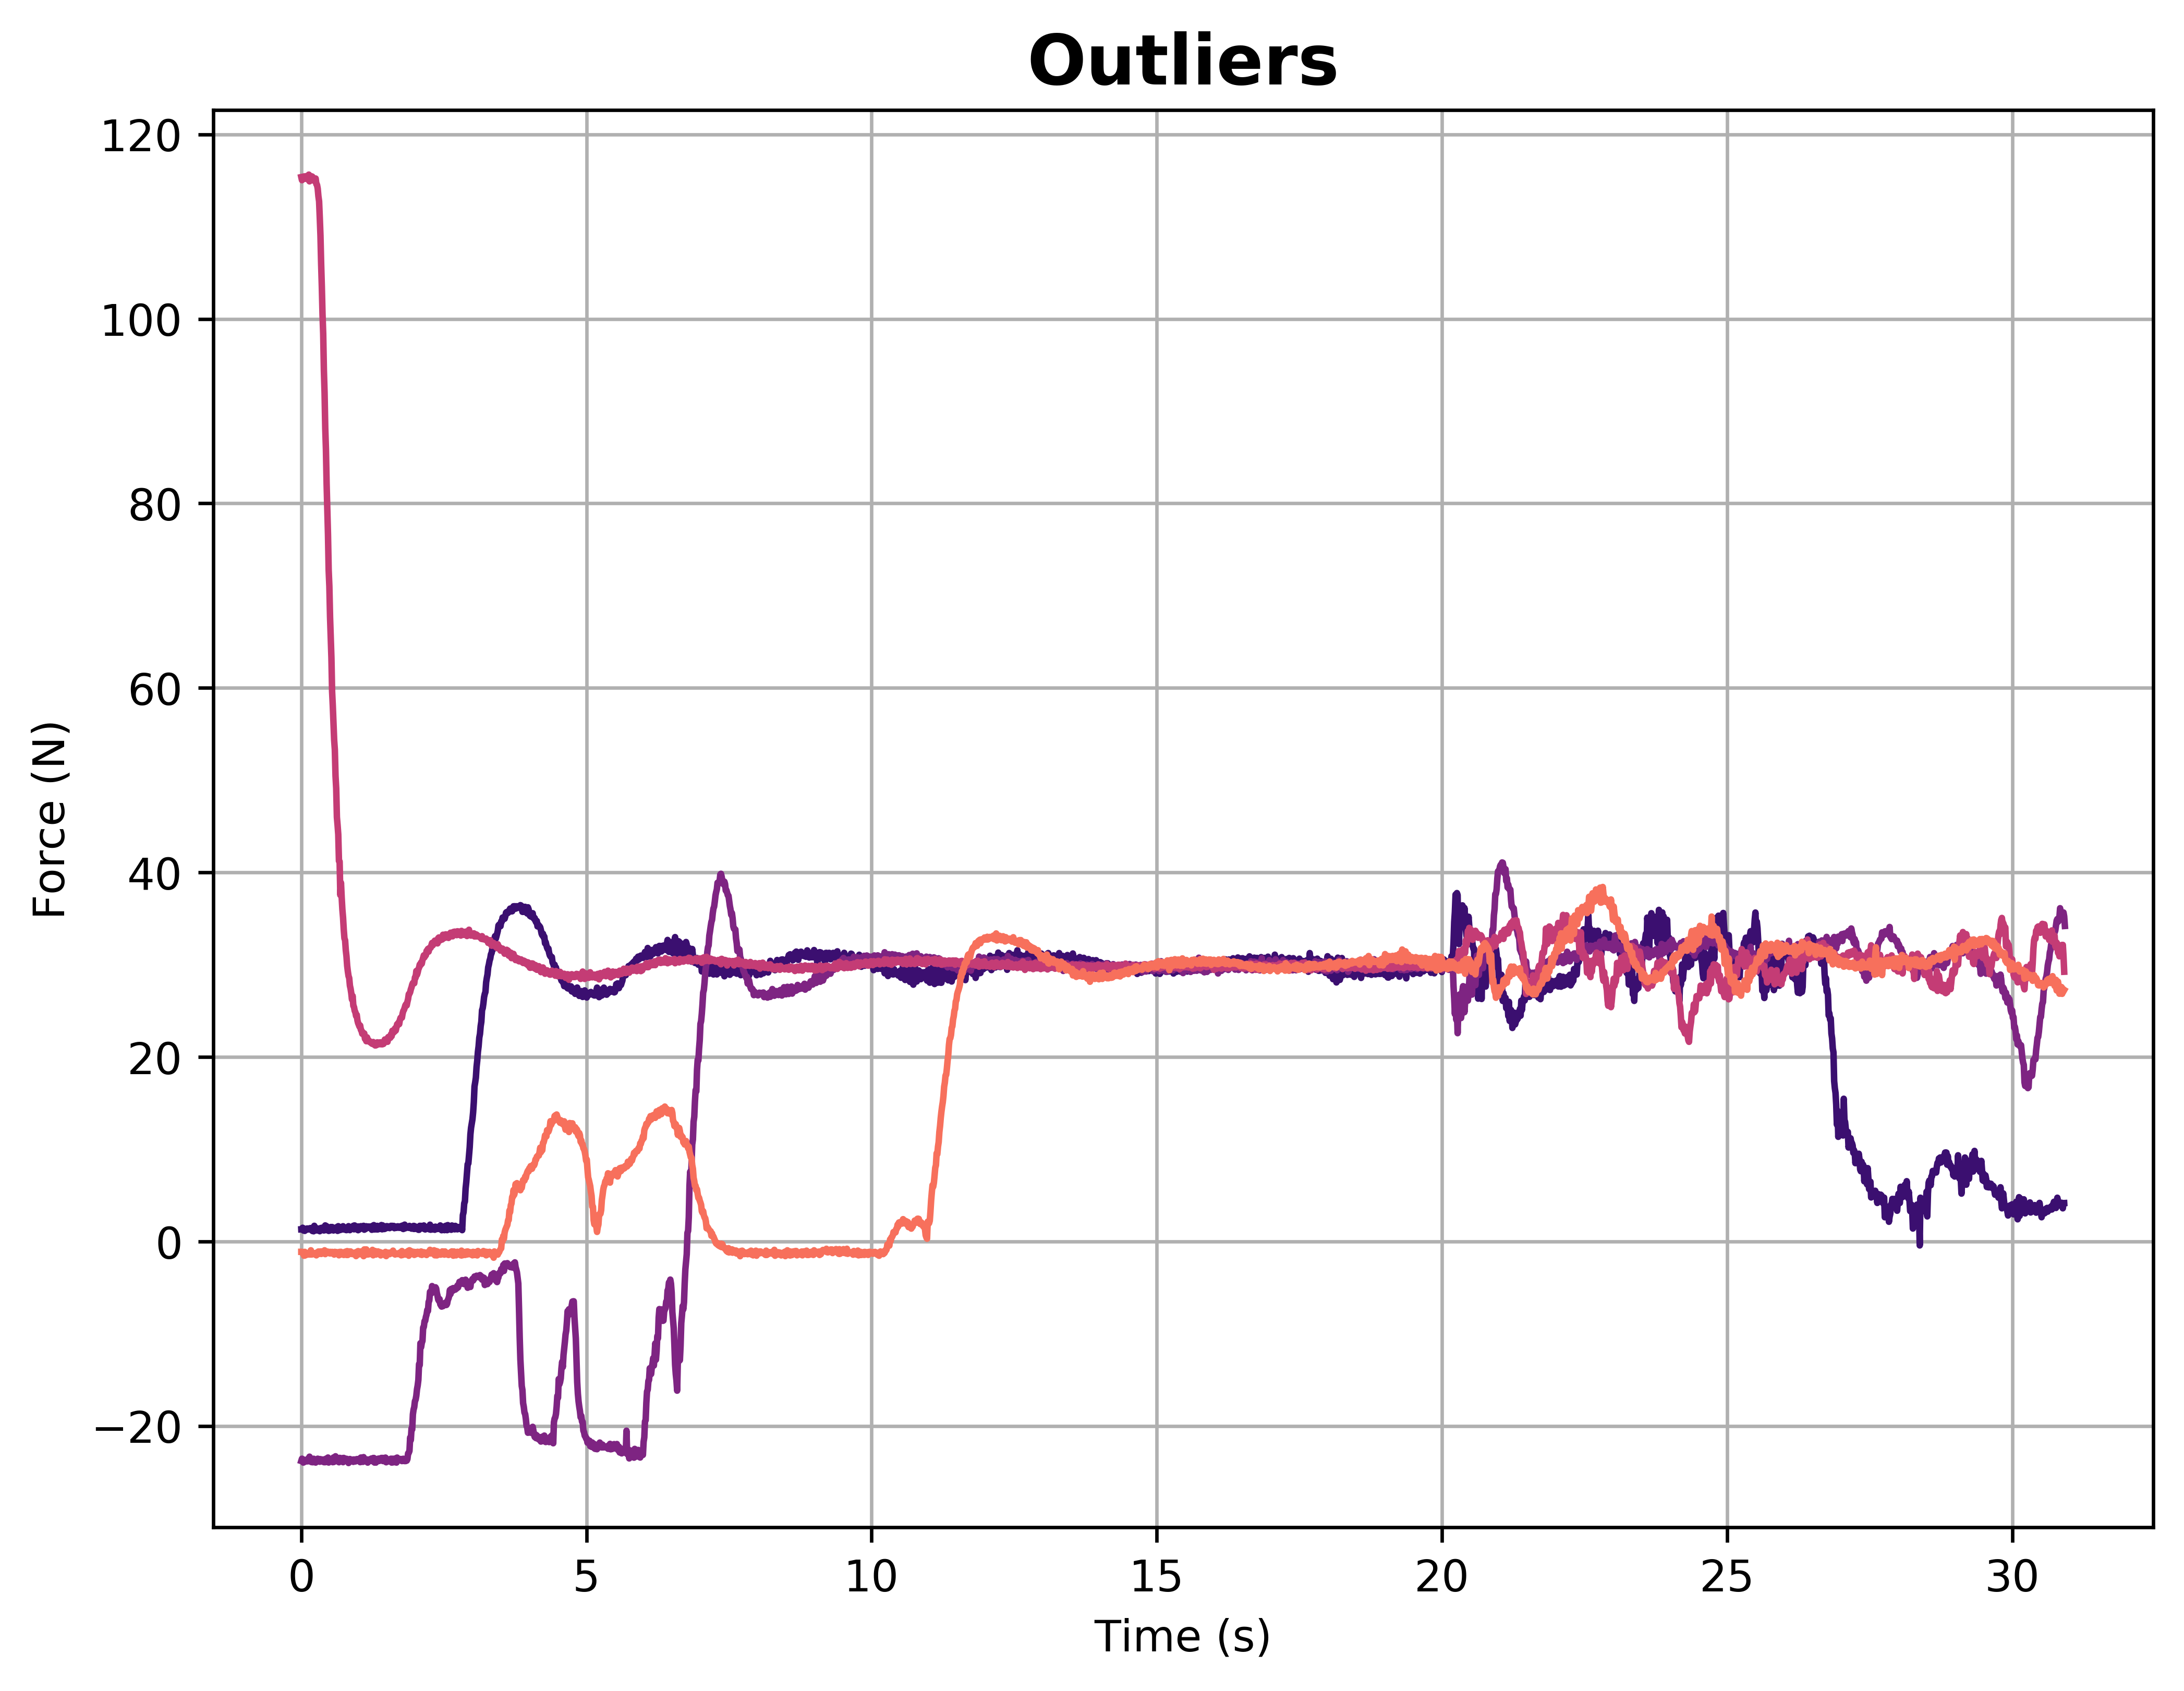

In [5]:
fig_outl = plt.figure(figsize=(8,6), dpi=600)
ax_outl = fig_outl.add_subplot(1,1,1)

for i in range(4):
    ax_outl.plot(x_axis, outl_samples[i], color=magma[i])

ax_outl.set_ylabel('Force (N)')
ax_outl.set_xlabel('Time (s)')
ax_outl.set_title('Outliers', fontweight='bold', fontsize=16)

fig_outl.savefig(IMAGE_PATH+'outliers.jpg', dpi=600, bbox_inches='tight')
fig_outl.savefig(IMAGE_PATH+'outliers.png', dpi=600, bbox_inches='tight')

### Clean data

#### After removing outliers, synchronizing the timestpeps and standardizing the data.

In [6]:
### Gets clean data
clean_data = pd.read_csv(PROCESSED_DATA_PATH+'fz.csv', index_col=0)
clean_data_labels = pd.read_csv(PROCESSED_DATA_PATH+'labels.csv', index_col=0)

### Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(clean_data)

### Chooses 4 random examples from each category
mount_samples_idx = np.random.choice(
    clean_data_labels[clean_data_labels['labels_0']==1].index.values.astype('int16'),4)
jammed_samples_idx = np.random.choice(
    clean_data_labels[clean_data_labels['labels_0']==2].index.values.astype('int16'),4)
nmount_samples_idx = np.random.choice(
    clean_data_labels[clean_data_labels['labels_0']==3].index.values.astype('int16'),4)

### Transfroms each example into a numpy array
clean_mount_samples = np.array(clean_data.iloc[mount_samples_idx-1])*(-1)
clean_jammed_samples = np.array(clean_data.iloc[jammed_samples_idx-1])*(-1)
clean_nmount_samples = np.array(clean_data.iloc[nmount_samples_idx-1])*(-1)
clean_set_samples = [clean_mount_samples[0], clean_jammed_samples[0], clean_nmount_samples[0]]

#clean_mount_samples = scaler.transform(clean_mount_samples)
#clean_jammed_samples = scaler.transform(clean_jammed_samples)
#clean_nmount_samples = scaler.transform(clean_nmount_samples)

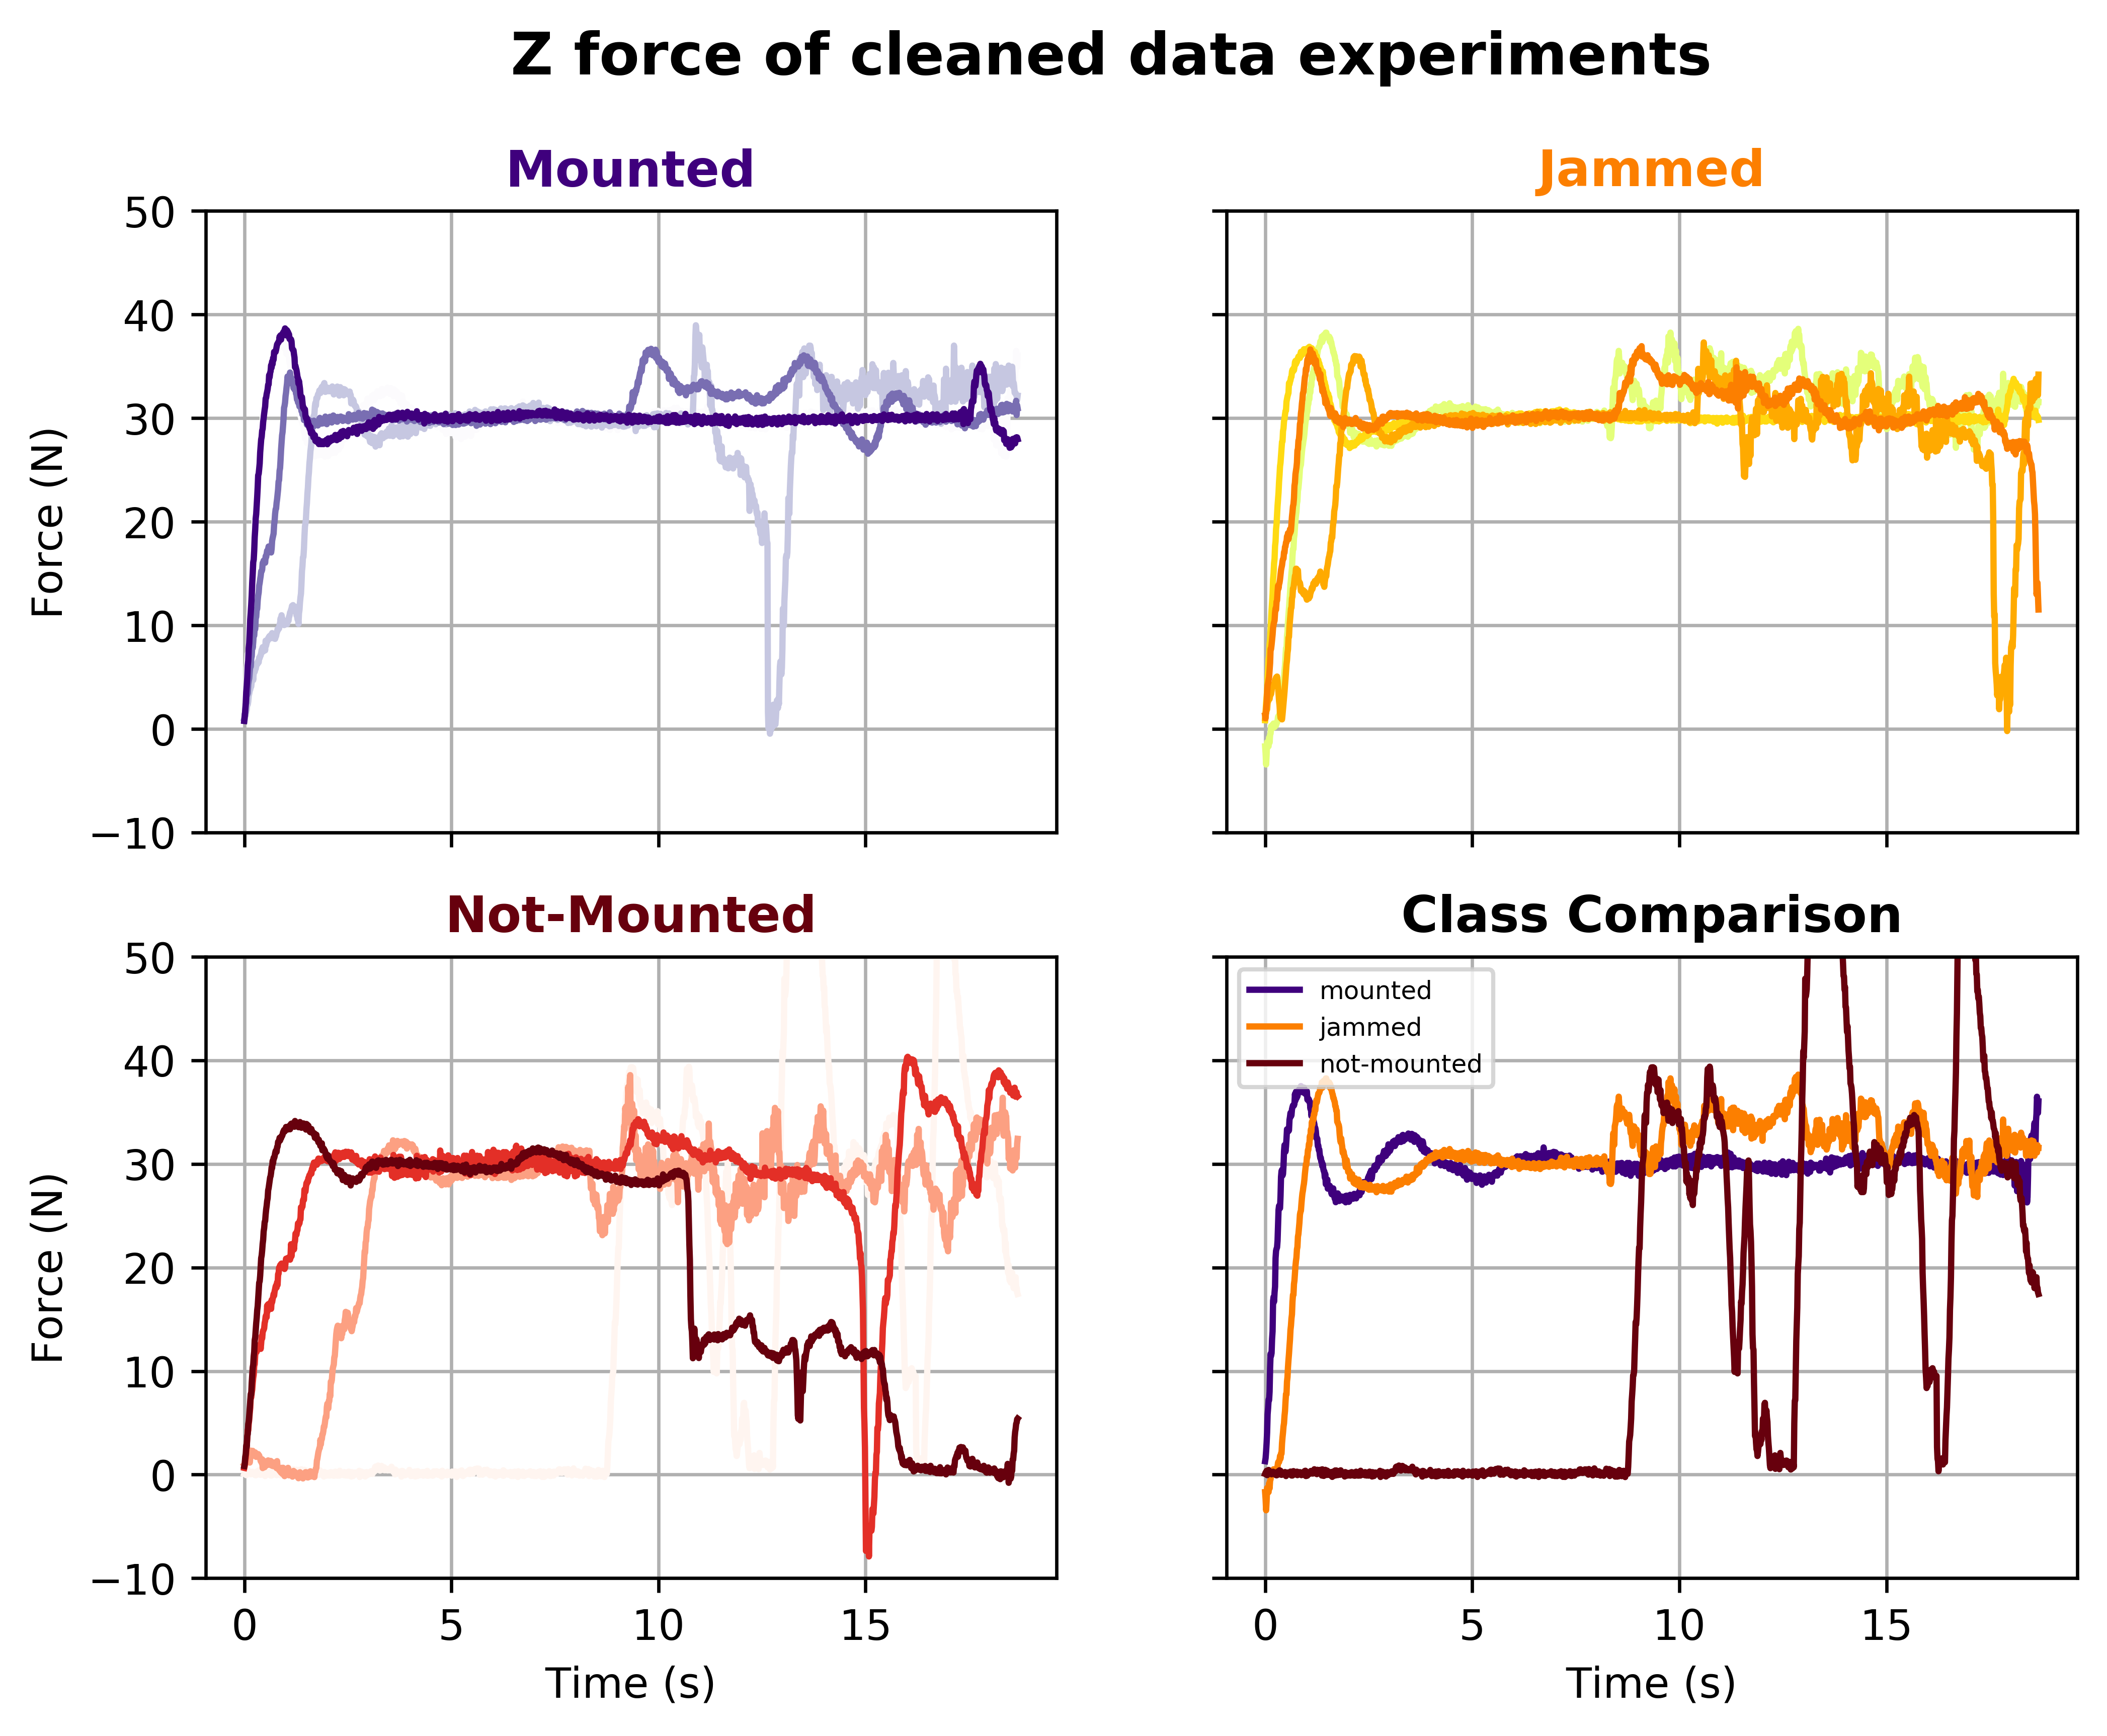

In [7]:
### Sets subplots
fig_clean, ax_clean = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,6), dpi=600)
fig_clean.suptitle('Z force of cleaned data experiments', fontsize=14, fontweight='bold')

x_axis_clean = np.linspace(0,len((clean_mount_samples[0]))*12/(1000), len(clean_mount_samples[0]) )

for i, p, o, r in zip(range(4), purple, orange, red):
    
    ax_clean[0,0].plot(x_axis_clean, clean_mount_samples[i], color=p)
    ax_clean[0,1].plot(x_axis_clean, clean_jammed_samples[i], color=o)
    ax_clean[1,0].plot(x_axis_clean, clean_nmount_samples[i], color=r)
    
    if i != 3:
        ax_clean[1,1].plot(x_axis_clean, clean_set_samples[i],color=colors_set[i], label=classes[i])

ax_clean[0,0].set_ylim([-10,50])
    
ax_clean[0,0].set_title('Mounted', color=purple[3], fontweight='bold')
ax_clean[0,1].set_title('Jammed', color=orange[3], fontweight='bold') 
ax_clean[1,0].set_title('Not-Mounted', color=red[3], fontweight='bold') 
ax_clean[1,1].set_title('Class Comparison', fontweight='bold')

ax_clean[1,0].set_xlabel('Time (s)')
ax_clean[1,1].set_xlabel('Time (s)')
ax_clean[0,0].set_ylabel('Force (N)')
ax_clean[1,0].set_ylabel('Force (N)')
ax_clean[1,1].legend(loc='upper left', prop={'size':6})

fig_clean.savefig(IMAGE_PATH+'clean_data2.jpg', dpi=600, bbox_inches='tight')
fig_clean.savefig(IMAGE_PATH+'clean_data2.png', dpi=600, bbox_inches='tight')

### Direct Comparison

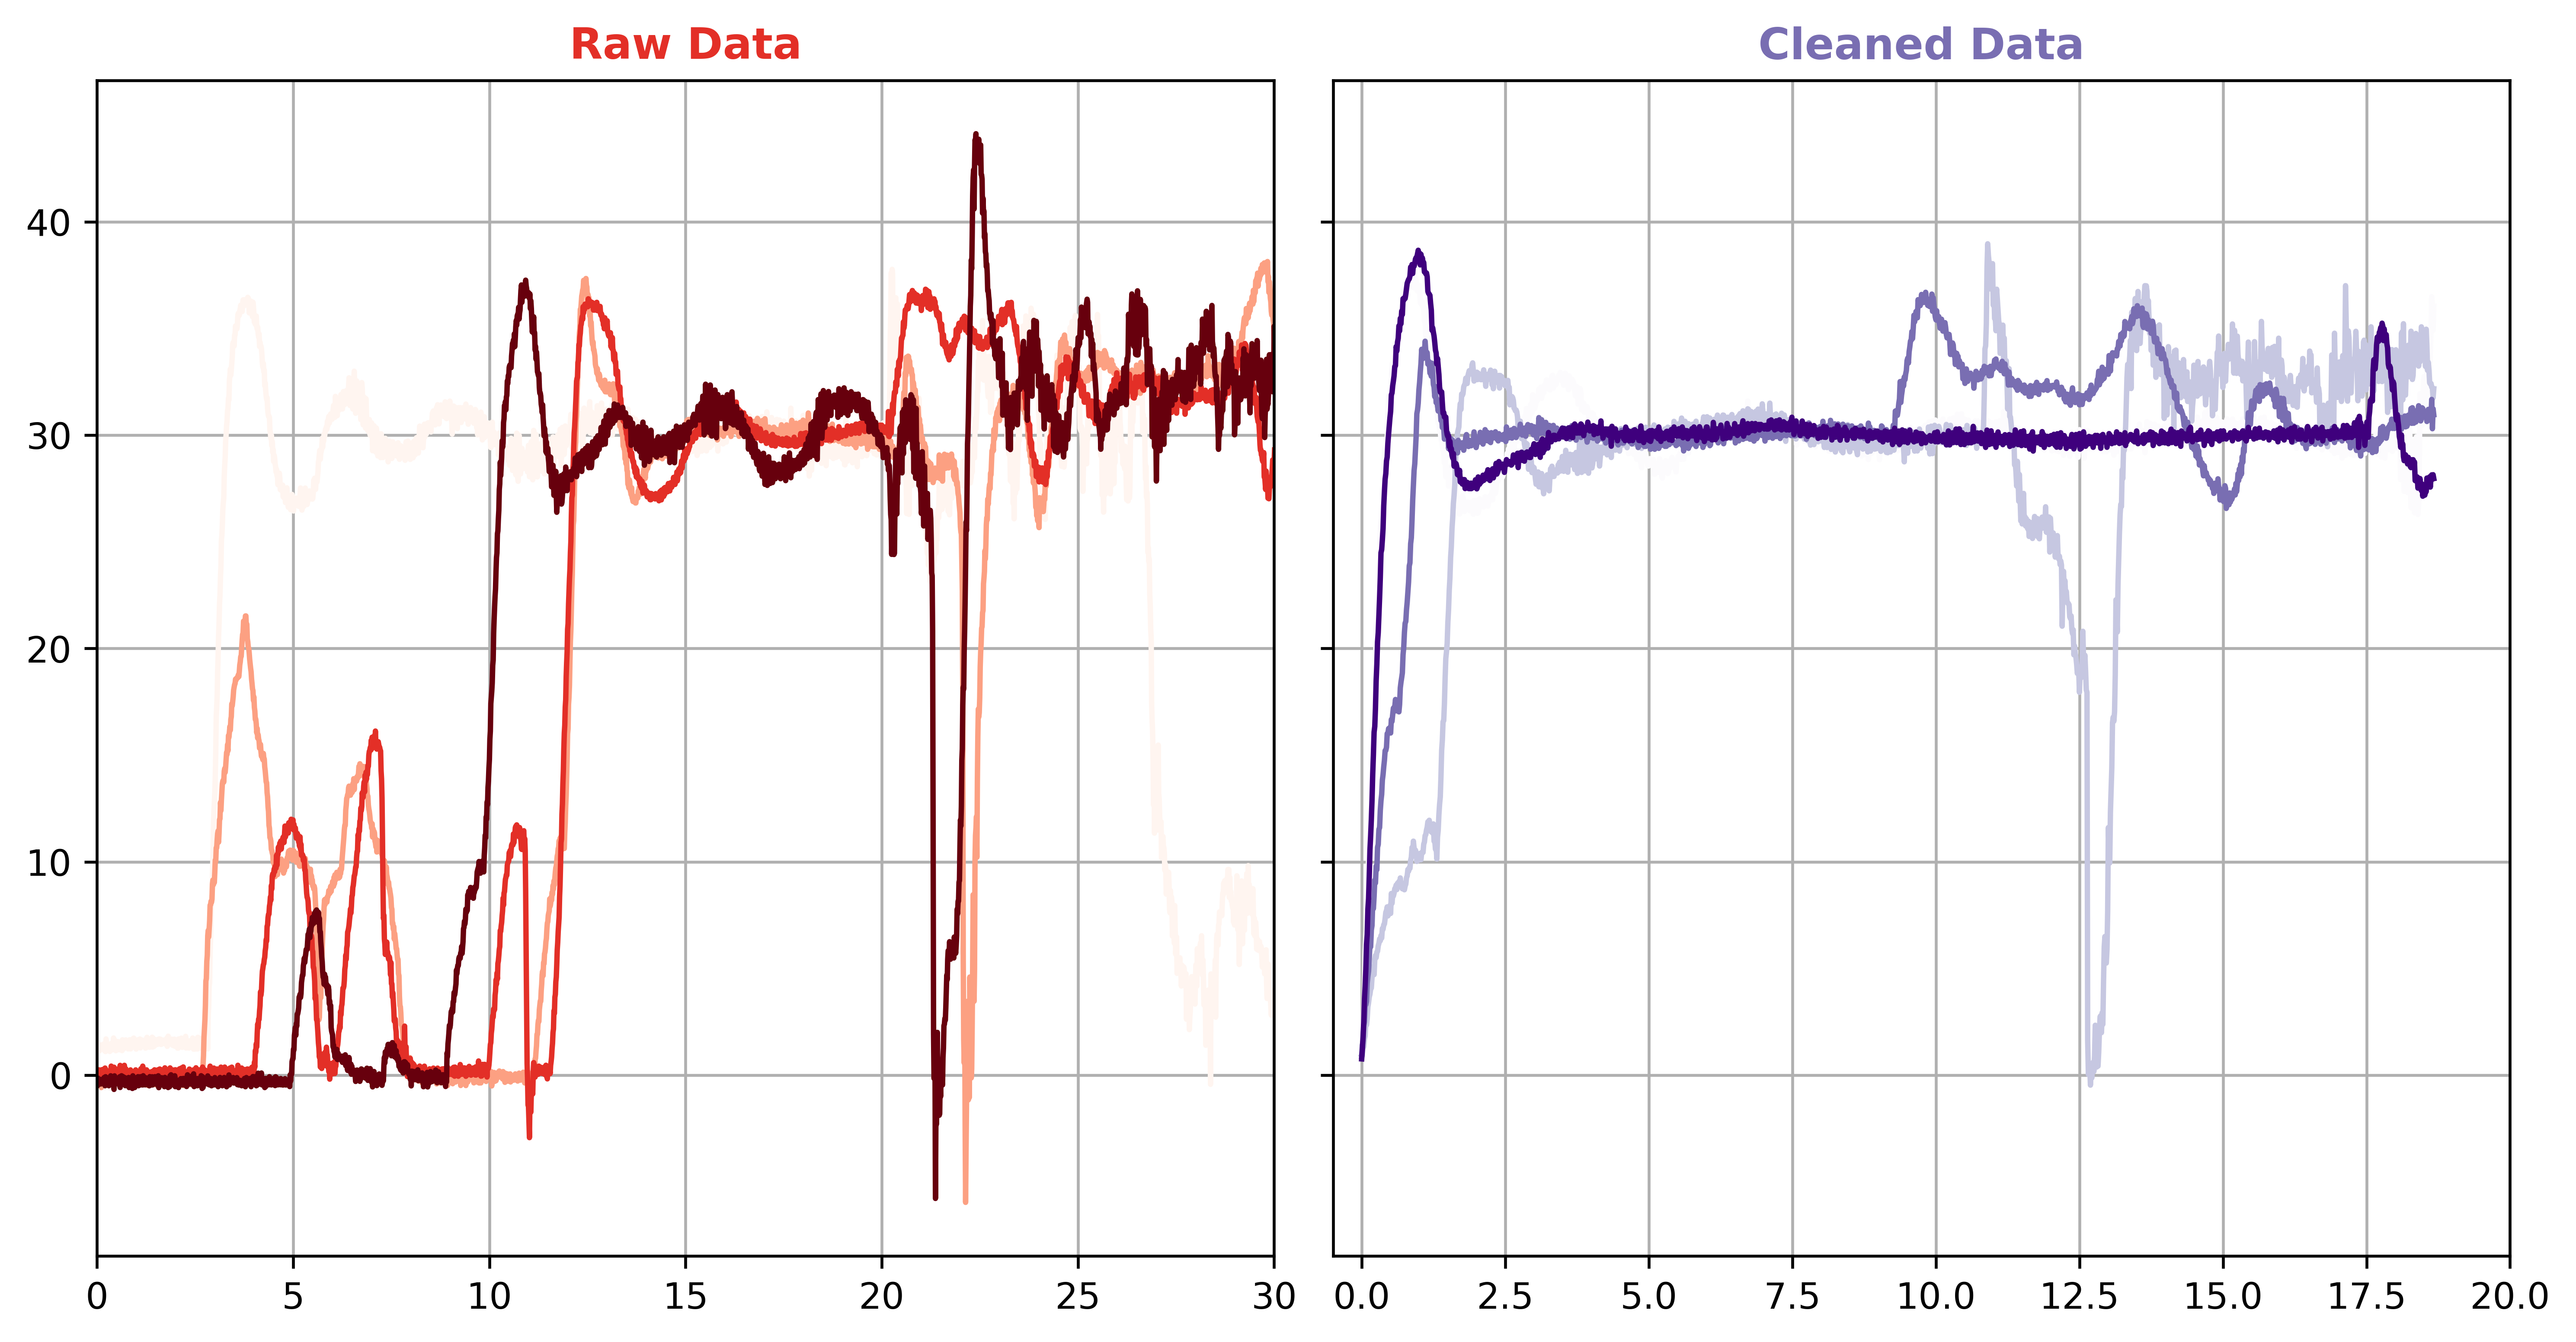

In [8]:
comp_fig, comp_ax = plt.subplots(1,2, sharey=True, figsize=(12,6), dpi=600)

comp_ax[0].set_title('Raw Data', fontweight='bold', color=red[2])
comp_ax[1].set_title('Cleaned Data', fontweight='bold', color=purple[2])

comp_ax[0].set_xlim([0, 30])
comp_ax[1].set_xlim([-0.5, 20])

for i in range(4):
    comp_ax[0].plot(x_axis, mount_samples[i], color=red[i])
    comp_ax[1].plot(x_axis_clean, clean_mount_samples[i], color=purple[i])

comp_fig.subplots_adjust(wspace=0.05, hspace=0.125)



In [10]:
comp_fig.savefig('../../Images/comp_fig.png', dpi=600, bbox_inches='tight')
comp_fig.savefig('../../Images/comp_fig.jpg', dpi=600, bbox_inches='tight')